In [1]:
import os
from typing import List, Dict, Tuple

import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model, svm, metrics
import xgboost as xgb

from beat2d import settings

In [2]:
DATASET_PATH = "../data/oneshots/"
CLASSES = ["kick", "snare"]
LABELS = {"kick": 0, "snare": 1}

In [3]:
def load_dataset(dataset_path: str, classes: List[str]) -> Tuple[List[np.ndarray], List[str]]:
    data: List[np.ndarray] = []
    labels: List[str] = []
    
    for cls in classes:
        class_dir = os.path.join(DATASET_PATH, cls)
        class_dir = os.path.abspath(class_dir)
        
        if not os.path.isdir(class_dir):
            raise ValueError(f"No folder {cls} in {dataset_path}")
        
        for fname in os.listdir(class_dir):
            sample, sample_rate = librosa.core.load(os.path.join(class_dir, fname), settings.SAMPLE_RATE)
            data.append(sample)
            labels.append(LABELS[cls])
    
    return data, labels

In [4]:
data, labels = load_dataset(DATASET_PATH, CLASSES)

In [5]:
# Find the min, max, average length of the mfcc
min_ = float('inf')
max_ = -1
max_d = None
total = 0
lengths = []

for d in data:
    mfcc_d = librosa.feature.mfcc(d, sr=settings.SAMPLE_RATE, n_mfcc=40)
    
    length = mfcc_d.shape[1]
    lengths.append(length)
    
    total += length
    
    if length < min_:
        min_ = length
    
    if length > max_:
        max_ = length
    
avg = total / len(data)

print(min_, max_, avg)

/home/jason/miniconda3/envs/beat2d/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1210
  n_fft, y.shape[-1]


3 68 22.7027027027027


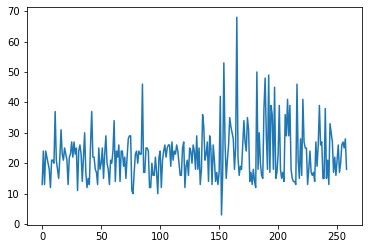

In [6]:
plt.plot(lengths)

Experimentally, 20 is probably a good place to pad to and cut to without losing data. This is probably even large for what I need, but we will try it for now.

In [7]:
def preprocess_data(data: List[np.ndarray], n_mfcc: int = 40, length: int = 20) -> List[np.ndarray]:
    preprocessed_data: List[np.ndarray] = []
    
    for idx, d in enumerate(data):
        preprocessed_d: np.ndarray = np.zeros((n_mfcc, length))
            
        mfcc_d: np.ndarray = librosa.feature.mfcc(d, sr=settings.SAMPLE_RATE, n_mfcc=n_mfcc)
        preprocessed_d[:, :min(length, mfcc_d.shape[1])] = mfcc_d[:, :min(length, mfcc_d.shape[1])]
        
        preprocessed_data.append(preprocessed_d.flatten())
        
    return preprocessed_data

In [8]:
p_data = preprocess_data(data)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(p_data, labels, test_size=0.2, random_state=1)

Training a Stochastic Gradient Descent Support Vector Machine classifier.

In [10]:
clf_SGDSVM = linear_model.SGDClassifier(loss="hinge")

In [11]:
clf_SGDSVM.fit(X_train, y_train)

SGDClassifier()

In [12]:
clf_SGDSVM.score(X_test, y_test)

0.8846153846153846

Training a Stochastic Gradient Descent Logistic Regression classifier.

In [13]:
clf_SGDLGR = linear_model.SGDClassifier(loss="log")

In [14]:
clf_SGDLGR.fit(X_train, y_train)

SGDClassifier(loss='log')

In [15]:
clf_SGDLGR.score(X_test, y_test)

0.5

Training a Stochastic Gradient Descent Support Vector Machine classifier.

In [16]:
clf_SGD = linear_model.SGDClassifier()

In [17]:
clf_SGD.fit(X_train, y_train)

SGDClassifier()

In [18]:
clf_SGD.score(X_test, y_test)

0.8846153846153846

Training a Stochastic Gradient Descent Support Vector Machine classifier.

In [19]:
clf_SGD = linear_model.SGDClassifier()

In [20]:
clf_SGD.fit(X_train, y_train)

SGDClassifier()

In [21]:
clf_SGD.score(X_test, y_test)

0.8076923076923077

Training a Support Vector classifier.

In [22]:
clf_SVC = svm.SVC()

In [23]:
clf_SVC.fit(X_train, y_train)

SVC()

In [24]:
clf_SVC.score(X_test, y_test)

0.8269230769230769

Training a Boosted Tree classifier.

In [25]:
dtrain = xgb.DMatrix(np.array(X_train), label=y_train)
dtest = xgb.DMatrix(np.array(X_test), label=y_test)

In [26]:
clf_xgb = xgb.XGBClassifier(objective="reg:logistic", learning_rate=0.1, label_encoder=False)

In [27]:
y_train

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0]

In [28]:
clf_xgb.fit(np.array(X_train), y_train)

/home/jason/miniconda3/envs/beat2d/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:24] WARNING: ../src/learner.cc:541: 
Parameters: { label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              label_encoder=False, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='reg:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
preds = clf_xgb.predict(np.array(X_test))

In [30]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))

In [31]:
print("RMSE: %f" % (rmse))

RMSE: 0.196116
